#**Predicting Wellness**

##About Dataset


---


This collection of data provides approximations of the percentage of body fat, which were obtained by measuring body circumference and using underwater weighing methods for 168 men. Multiple regression methods can be utilized to forecast the correct body fat measurements. It is challenging and expensive to measure body fat accurately, and it would be beneficial to have simple and inexpensive ways to estimate body fat.

##Various features in the data

---

Density determined from underwater weighing

Percent body fat from Siri's (1956) equation

Age (years)

Weight (lbs)

Height (inches)

Neck circumference (cm)

Chest circumference (cm)

Abdomen 2 circumferences (cm)

Hip circumference (cm)

Thigh circumference (cm)

Knee circumference (cm)

Ankle circumference (cm)

Biceps (extended) circumference (cm)

Forearm circumference (cm)

Wrist circumference (cm)

**How well you define the problem/question of interest?**

Main Problem Statement

> The problem statement of the project is to develop a model that aims to provide accurate and reliable estimates of body fat percentage, which can be valuable for assessing individual health status and informing personalized fitness ans nutrition interventions.

Other questions:

Determine whether the mean body fat percentage is the same for individuals below and above 50 years of age.

Investigate whether there is a correleation between height and body fat percentage.

Examine whether there is a significant differencein body fat percentage between different age groups.

In [59]:
#Installing all the libraries
install.packages('corrplot')
install.packages('bnlearn')
install.packages('leaps')
install.packages('Metrics')
install.packages('gridExtra')
install.packages('car')
install.packages('MASS')
install.packages('dplyr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [60]:
#Defining all the libraries
library('readr')
library('tidyverse')
library('dplyr')
library('ggplot2')
library('corrplot')
library('bnlearn')
library('leaps')
library('Metrics')
library('purrr')
library('tidyr')
library('gridExtra')
library('boot')
library('car')
library('leaps')
library('MASS')
library('stats')

In [61]:
#reading data from csv
train=read.csv('/content/bodyfat-comp.csv')
dim(train)

[1] 168  16

They are 16 columns and 168 rows in the dataframe.

In [62]:
names(train)

[1] "Id"      "Density" "BodyFat" "Age"     "Weight"  "Height"  "Neck"   
 [8] "Chest"   "Abdomen" "Hip"     "Thigh"   "Knee"    "Ankle"   "Biceps" 
[15] "Forearm" "Wrist"

In [63]:
head(train)

,Id,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Person2,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,Person3,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,Person4,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,Person6,1.0502,20.9,24,210.25,74.75,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8
5,Person7,1.0549,19.2,26,181.00,69.75,36.4,105.1,90.7,100.3,58.4,38.3,22.9,31.9,27.8,17.7
6,Person8,1.0704,12.4,25,176.00,72.50,37.8,99.6,88.5,97.1,60.0,39.4,23.2,30.5,29.0,18.8


**Checking for the null values**

In [64]:
sum(is.na(train))

[1] 0

They are no na values in train dataframe.

In [65]:
summary(train)

      Id               Density         BodyFat           Age       
 Length:168         Min.   :0.995   Min.   : 3.00   Min.   :22.00  
 Class :character   1st Qu.:1.042   1st Qu.:12.18   1st Qu.:35.00  
 Mode  :character   Median :1.055   Median :19.20   Median :43.00  
                    Mean   :1.056   Mean   :18.99   Mean   :44.72  
                    3rd Qu.:1.071   3rd Qu.:25.23   3rd Qu.:54.00  
                    Max.   :1.093   Max.   :47.50   Max.   :72.00  
     Weight          Height           Neck           Chest       
 Min.   :127.5   Min.   :29.50   Min.   :31.10   Min.   : 83.40  
 1st Qu.:159.0   1st Qu.:68.25   1st Qu.:36.40   1st Qu.: 93.83  
 Median :174.1   Median :70.00   Median :37.90   Median : 99.55  
 Mean   :177.3   Mean   :70.05   Mean   :37.96   Mean   :100.19  
 3rd Qu.:195.2   3rd Qu.:72.25   3rd Qu.:39.33   3rd Qu.:104.75  
 Max.   :244.2   Max.   :77.50   Max.   :43.90   Max.   :121.60  
    Abdomen            Hip             Thigh            Knee  

The `id` column serves as a unique identifier for each individual in the dataset but doesn't contribute to the analysis of body composition. Removing it streamlines the data focusing on other relevant features.

In [66]:
train<- subset(train,select=-Id)

##**Exploratory Data Analysis**

Let's plot histogram of all the features to visualize their distribution.


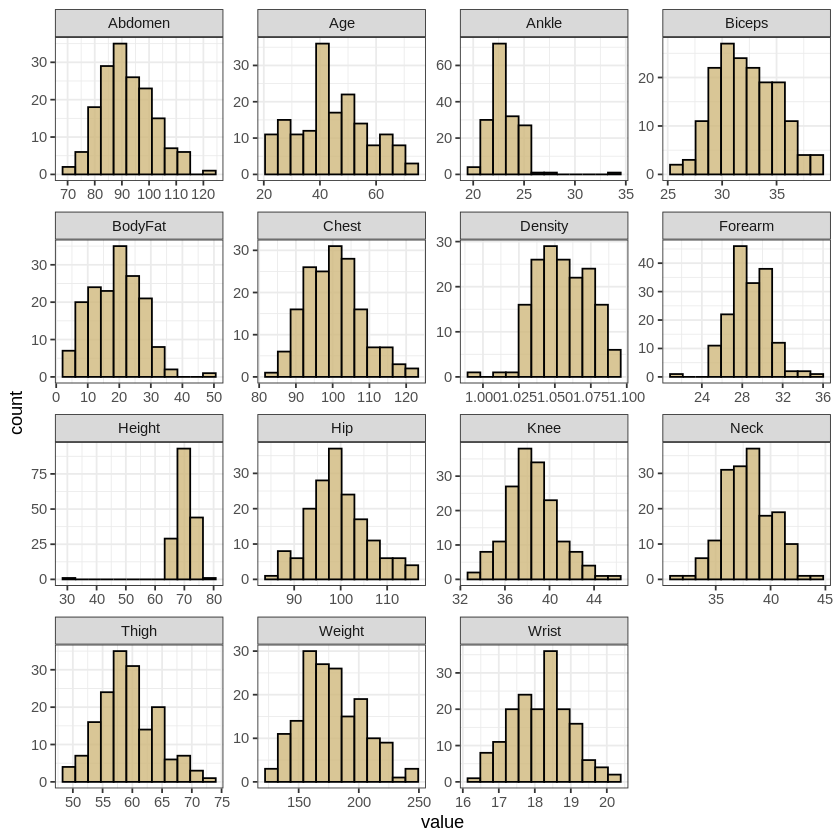

In [67]:
#plotting histogram for all features
train %>%
  keep(is.numeric) %>%
  gather() %>%
  ggplot(aes(value)) +
    facet_wrap(~ key, scales = "free") +
    geom_histogram(bins = 12, color="black", fill ="#CFB87C", alpha = 0.8) +
    theme_bw()

Most histograms show bell shaped distribution indicating that the data points tend to cluster around a central value suggesting normal distribution.

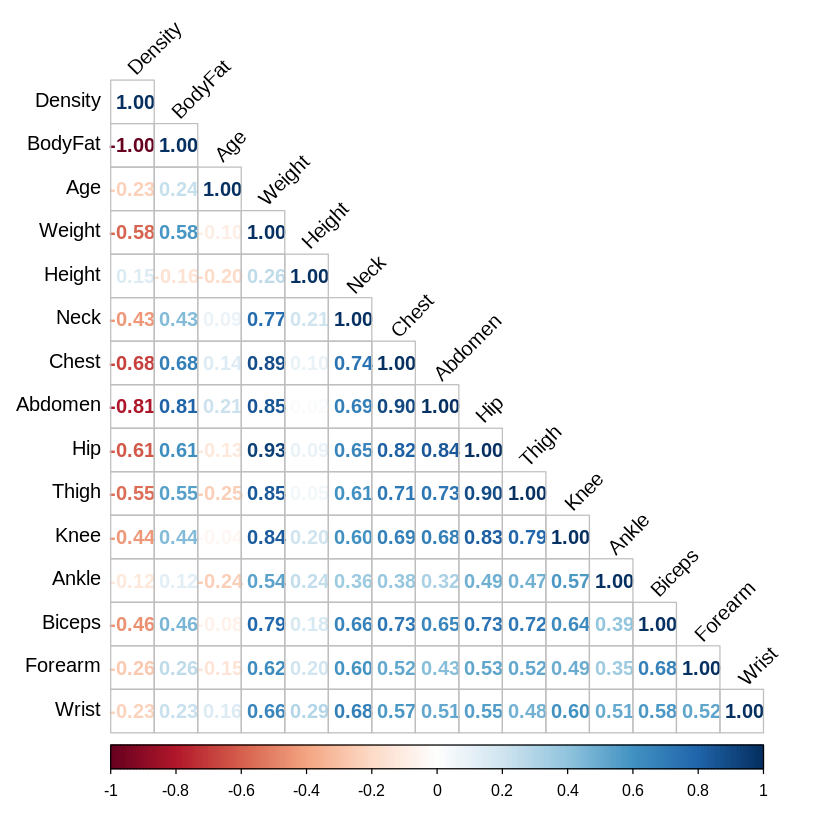

In [68]:
correlation_matrix <-cor(train)

#creating the correlation plot with numbered cells

corrplot(correlation_matrix,method='number',type='lower',tl.col='black',tl.srt=45)

**We can observe high negative correlation of Density with most of features especially with BodyFat .**

#**Hypothesis Testing**




###To answer the question :

Determine whether the mean body fat percentage is the same for individuals below and above 50 years of age.

For this we will leverage **T-test**

$Hypothesis 1$

$H0:$ The mean `BodyFat` is same for the people below and above 50 years of age.

$H1:$ The mean `BodyFat` is different for the people below and above 50 years of age.

In [69]:
# Performing t test

# Creating a duplicate dataframe train_1

train_1<-train

# Creating age group column

train_1$age_group <-ifelse(train_1$Age >=50, "50+","Under 50")

#performing t-test

t_test_age_bodyfat <-t.test(BodyFat ~ age_group, data=train_1)

t_test_age_bodyfat


	Welch Two Sample t-test

data:  BodyFat by age_group
t = 1.7665, df = 102.13, p-value = 0.0803
alternative hypothesis: true difference in means between group 50+ and group Under 50 is not equal to 0
95 percent confidence interval:
 -0.2938883  5.0796026
sample estimates:
     mean in group 50+ mean in group Under 50 
              20.58929               18.19643 


Let the significance level be $5$%. Since P-value is 0.0803 which is greater than 5%.

Therefore we fail to reject null hypothesis and **hence the mean `BodyFat` is same for the people below and above 50 years of age.**

###To answer the question:

Investigate whether there is a correleation between height and body fat percentage.

We have use **Pearson's correlation test**

$Hypothesis 2$

$H0:$ There is no correlation between `Height` and `BodyFat`

$H1:$ There is a correlation between `Height` and `BodyFat`

In [70]:
#performing pearson test
cor_test_height_bodyfat <- cor.test(train$Height, train$BodyFat, method = "pearson")
cor_test_height_bodyfat


	Pearson's product-moment correlation

data:  train$Height and train$BodyFat
t = -2.0295, df = 166, p-value = 0.044
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.299945542 -0.004293757
sample estimates:
       cor 
-0.1556024 


Considering significance level as $5$ %.

Since the p value is $4.4$ % which is less than $5$% we can conclude that null hypothesis is rejected.

Hence,

**There is a correlation between `Height` and `BodyFat`**



---



#**Hypothesis Testing with Randomization**

###To answer the question

Examine whether there is a significant difference in body fat percentage between different age groups.


Hypothesis testing with randomization is a good option for examining differences in body fat percentage between age groups because it is a flexible and assumption free methodology to statistically infer differences or similarities in the groups being compared.

H0: There is no difference in BodyFat between age groups

H1: There is  difference in BodyFat between age groups

In [71]:
# Defining the groups
group_1<- train$BodyFat[train$Age <30]
group_2<- train$BodyFat[train$Age >= 30]

# Creating a function that compute test statistic ie difference in means

test_stat<- function(x,y){
  mean(x) - mean(y)
}

# Observed test statistic

observed_stat<- test_stat(group_1,group_2)

# Define randomization function

random_test<-function(x,y){
  combined<-c(x,y)
  perm<-sample(combined)
  test_stat(perm[1:length(x)],perm[(length(x) +1):length(combined)])

}


[1] "The P value is: 0.011"

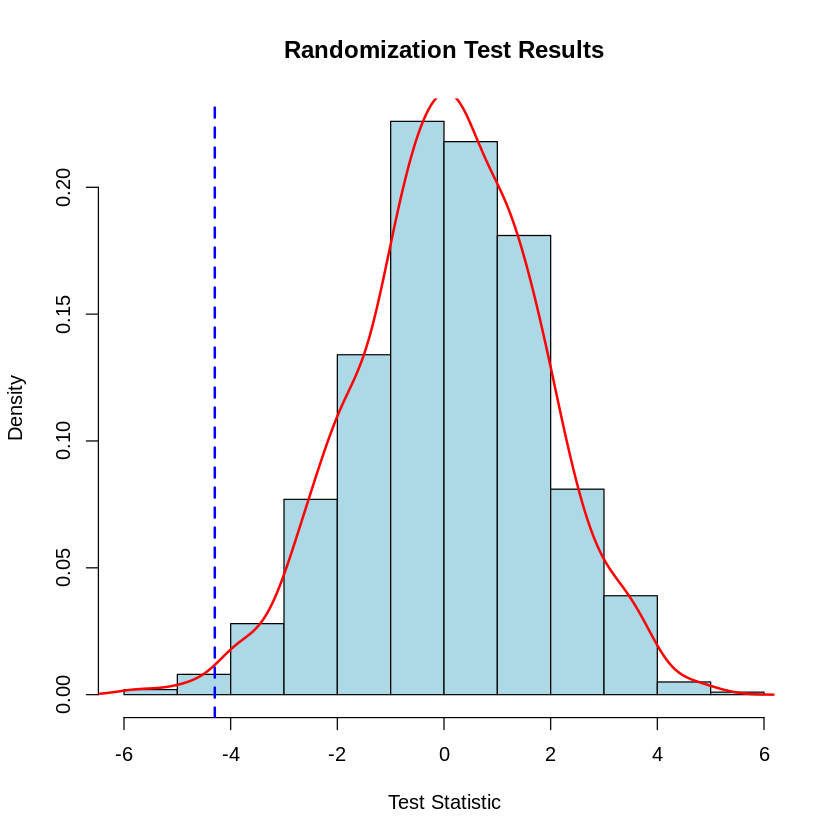

In [72]:

set.seed(123)

# calculating p-value

b3000 <- replicate(3000,random_test(group_1,group_2))

pvalue<-mean(abs(randomization_result)>=abs(observed_stat))

paste0('The P value is: ',pvalue)

# plotting the results using histogram

hist(randomization_result,main="Randomization Test Results",xlab="Test Statistic",col='lightblue',border = 'black',probability = TRUE)
lines(density(randomization_result),col='red',lwd=2)
abline(v=observed_stat,col='blue',lwd=2,lty=2)

Since the P value is less than the significance value of 0.05 therefore null hypothesis fail.

Hence,

`There is  difference in BodyFat between age groups`


---



Since the p value is more than significance value `5%` therefore we fail to reject null hypothesis implying that


There is no correlation between `Weight` and `BodyFat`


---



##**The following sections are a comprehensive solution of the main problem statement of the project. ie**

##**To develop a model that aims to provide accurate and reliable estimates of body fat percentage, which can be valuable for assessing individual health status and informing personalized fitness ans nutrition interventions.**

#**Linear Regression**


Why use linear regression?

because it provides a clear framework for understanding how various features linearly affect body fat percentage, helps to evaluate significance of each features, understanding which of them are influential and not.

Plotting the Scatterplots of features vs outcome helps visualise relationship between them. The linear regression lines provide a clear indication of the direction and strength of the relationship, allowing for better interpretation of how changes in these measurements may impact body fat levels.

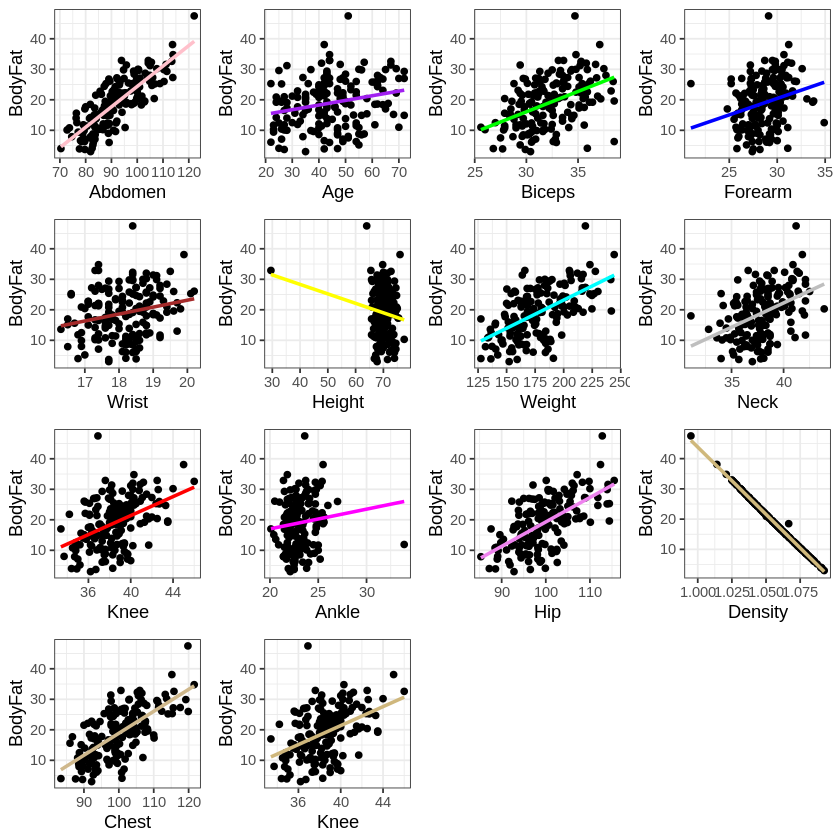

In [74]:
#plotting feature distribution against outcome

grid.arrange(ggplot(train,aes(x=Abdomen,y=BodyFat)) +
  geom_point() +
  geom_smooth(method='lm',formula=y~x,col='Pink',se=F)+
  theme_bw()+
  xlab('Abdomen')+
  ylab('BodyFat'),

ggplot(train,aes(x=Age,y=BodyFat)) +
  geom_point() +
  geom_smooth(method='lm',formula=y~x,col='Purple',se=F)+
  theme_bw()+
  xlab('Age')+
  ylab('BodyFat'),

ggplot(train,aes(x=Biceps,y=BodyFat)) +
  geom_point() +
  geom_smooth(method='lm',formula=y~x,col='Green',se=F)+
  theme_bw()+
  xlab('Biceps')+
  ylab('BodyFat'),

ggplot(train,aes(x=Forearm,y=BodyFat)) +
  geom_point() +
  geom_smooth(method='lm',formula=y~x,col='Blue',se=F)+
  theme_bw()+
  xlab('Forearm')+
  ylab('BodyFat'),

ggplot(train,aes(x=Wrist,y=BodyFat)) +
  geom_point() +
  geom_smooth(method='lm',formula=y~x,col='Brown',se=F)+
  theme_bw()+
  xlab('Wrist')+
  ylab('BodyFat'),

ggplot(train,aes(x=Height,y=BodyFat)) +
  geom_point() +
  geom_smooth(method='lm',formula=y~x,col='Yellow',se=F)+
  theme_bw()+
  xlab('Height')+
  ylab('BodyFat'),

ggplot(train,aes(x=Weight,y=BodyFat)) +
  geom_point() +
  geom_smooth(method='lm',formula=y~x,col='Cyan',se=F)+
  theme_bw()+
  xlab('Weight')+
  ylab('BodyFat'),

ggplot(train,aes(x=Neck,y=BodyFat)) +
  geom_point() +
  geom_smooth(method='lm',formula=y~x,col='Gray',se=F)+
  theme_bw()+
  xlab('Neck')+
  ylab('BodyFat'),

ggplot(train,aes(x=Knee,y=BodyFat)) +
  geom_point() +
  geom_smooth(method='lm',formula=y~x,col='Red',se=F)+
  theme_bw()+
  xlab('Knee')+
  ylab('BodyFat'),

ggplot(train,aes(x=Ankle,y=BodyFat)) +
  geom_point() +
  geom_smooth(method='lm',formula=y~x,col='Magenta',se=F)+
  theme_bw()+
  xlab('Ankle')+
  ylab('BodyFat'),

ggplot(train,aes(x=Hip,y=BodyFat)) +
  geom_point() +
  geom_smooth(method='lm',formula=y~x,col='Violet',se=F)+
  theme_bw()+
  xlab('Hip')+
  ylab('BodyFat'),

ggplot(train,aes(x=Density,y=BodyFat)) +
  geom_point() +
  geom_smooth(method='lm',formula=y~x,col='#CFB87C',se=F)+
  theme_bw()+
  xlab('Density')+
  ylab('BodyFat'),

ggplot(train,aes(x=Chest,y=BodyFat)) +
  geom_point() +
  geom_smooth(method='lm',formula=y~x,col='#CFB88C',se=F)+
  theme_bw()+
  xlab('Chest')+
  ylab('BodyFat'),


ggplot(train,aes(x=Knee,y=BodyFat)) +
  geom_point() +
  geom_smooth(method='lm',formula=y~x,col='#CFB77C',se=F)+
  theme_bw()+
  xlab('Knee')+
  ylab('BodyFat'),

nrow=4
)

`Abdomen`,`Hip`,`Chest` and `Weight` shows positive relationship with bodyfat percentage.


`Wrist`, `knee` and `Ankle` depicts weaker association with `BodyFat` percentage.

`Density` displays negative correlation whereas `Age`, `Biceps`, `Forearm`,`Height` and `Neck` shows even more frail relationship with `BodyFat`

**Training multilinear regression model**

In [75]:
#base model
lmodel<-lm(BodyFat ~ .,data=train)
summary(lmodel)


Call:
lm(formula = BodyFat ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4792 -0.1325 -0.0546  0.0431  4.1277 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept)  4.883e+02  4.033e+00  121.080   <2e-16 ***
Density     -4.442e+02  3.151e+00 -140.975   <2e-16 ***
Age          4.282e-03  3.815e-03    1.122    0.263    
Weight       1.682e-03  6.359e-03    0.264    0.792    
Height      -1.172e-02  9.463e-03   -1.239    0.217    
Neck         3.792e-03  2.540e-02    0.149    0.882    
Chest       -5.987e-03  1.179e-02   -0.508    0.612    
Abdomen     -6.248e-03  1.151e-02   -0.543    0.588    
Hip          2.738e-02  1.901e-02    1.440    0.152    
Thigh       -1.588e-02  1.707e-02   -0.930    0.354    
Knee        -2.329e-02  2.891e-02   -0.806    0.422    
Ankle       -5.558e-03  2.726e-02   -0.204    0.839    
Biceps      -6.190e-03  2.011e-02   -0.308    0.759    
Forearm     -6.461e-04  2.317e-02   -0.028    0.978    
Wris

###**Observation**

$R^2$ value is quite high (99.77%) indicating over fitting.

`Density` feature has very high impact on model.

###**Conclusion**


**From the list of variables, Density might act as a proxy for the overall body composition or for variables that are related to body size and shape.**

**For instance, in body composition studies, density is a common measure to estimate body fat percentage, as it accounts for the relative density of fat mass and lean mass in the body.**


---



##**F- Test**

Why use F-test?

It is crucial for model development because it evaluates overall significance of the regression model. It helps in validating the relevance of model ensuring the model's predictions are based on stastically significant relationships.

$H0:$ The regression model is not signficant ie the coefficients of the independent variables are not jointly significant in explaining the variation in the dependent variable.

$H1:$ The regression model is significant , indicating that atleast one of the coefficients of the independent variables is significant in explaining the variation in the dependent variable.

In [76]:
model_summary<-summary(lm(BodyFat ~ .,data =train ))

f_statistic<-model_summary$fstatistic[1]

#calculating p value using f stat

p_value_f<-pf(f_statistic,df1 = model_summary$fstatistic[2],df2 = model_summary$fstatistic[3],lower.tail = FALSE)

print(p_value_f)

        value 
7.103956e-197 


**Observation**

The p value is 7.103956e-197


since p value  < < 0.05 we reject null hypothesis.  

**Conclusion**


The regression model is significant , indicating that atleast one of the coefficients of the independent variables is significant in explaining the variation in the dependent variable.

##**ANOVA Test**

Why use ANOVA test?

The test help to compare a full model (all features) and reduced model with not all features. This approach provides validationthat the chosen model captures the necessary relationships for accurate body fat estimation.

$H0: $ The reduced model fits the data as well as the full model.

$H1: $ The full model provides a better fit than the reduced model.

In [77]:
#defining reduced model

reduced_model<-lm(BodyFat ~ Density + Age +Weight,data=train)

#comparing both models
anova_result<-anova(reduced_model,lmodel)

anova_result

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,164,24.00491,NA,NA,NA,NA
2,153,23.10111,11,0.9038043,0.5441772,0.8704947


**Observation**

The p value is 0.8704947

**Conclusion**


Since `p-value` of `F statistic` is greater than significance level 0.05 therefore we fail to reject null hypothesis.


**The reduced model fits the data as well as the full model.**

#**Diagnostics**

Why use Diagnostics?

The are important to access if there is any violation of linear regression assumptions.

The Linear regression assumptions are:
- There must be a linear relationship between the response variable and the independent variables.

- Multivariate Normality - assume that residuals are normally distributed.

- No multicollinearity - assume that the independent variable are not highly correlated with each other.

- Homoscedasticity - assume that the variance of error terms is similar across the values of the independent variables.

It is essential to ensure robust model to predict `BodyFat` percentage.


In [78]:
#Goodness of Fit

print(summary(lmodel)$r.squared)

[1] 0.9978907


In [79]:
summary(lmodel)


Call:
lm(formula = BodyFat ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4792 -0.1325 -0.0546  0.0431  4.1277 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept)  4.883e+02  4.033e+00  121.080   <2e-16 ***
Density     -4.442e+02  3.151e+00 -140.975   <2e-16 ***
Age          4.282e-03  3.815e-03    1.122    0.263    
Weight       1.682e-03  6.359e-03    0.264    0.792    
Height      -1.172e-02  9.463e-03   -1.239    0.217    
Neck         3.792e-03  2.540e-02    0.149    0.882    
Chest       -5.987e-03  1.179e-02   -0.508    0.612    
Abdomen     -6.248e-03  1.151e-02   -0.543    0.588    
Hip          2.738e-02  1.901e-02    1.440    0.152    
Thigh       -1.588e-02  1.707e-02   -0.930    0.354    
Knee        -2.329e-02  2.891e-02   -0.806    0.422    
Ankle       -5.558e-03  2.726e-02   -0.204    0.839    
Biceps      -6.190e-03  2.011e-02   -0.308    0.759    
Forearm     -6.461e-04  2.317e-02   -0.028    0.978    
Wris

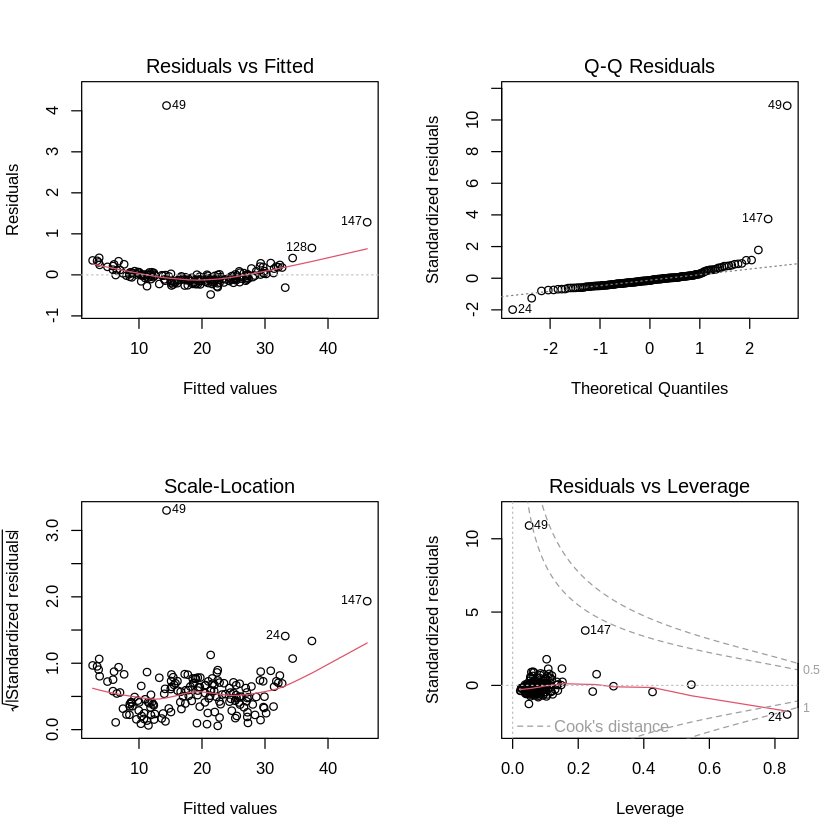

In [80]:
par(mfrow = c(2,2))

plot(lmodel)

**Observation**

Residuals vs Fitted: Slight heteroscedasticity is observed due to outliers

Q-Q Plot: The residuals are approximately normally distributed. Due to outliers can observe tails.

Scale-Location: As spread of residuals increase the fitted values increase indicating slight heteroscedasticity.

Residuals vs Leverage: Few points are above 0.5 line and can be influential

**Conclusion**

The outliers are causing sight violation of assumptions.

Model without density


---

Before we focus on the outliers it is important to take care features.

From correlation graph earlier as well we have found strong influence of density factor.

Let's try to understand it theortically.

As per Siri's equation:
D = Body Density (gm/cm^3)

A = proportion of lean body tissue

B = proportion of fat tissue (A+B=1)

a = density of lean body tissue (gm/cm^3)

b = density of fat tissue (gm/cm^3)

we have:

D = 1/[(A/a) + (B/b)]

solving for B we find:

B = (1/D)*[ab/(a-b)] - [b/(a-b)].


so BodyFat is inversely proprtional to Density. We proceed to build model without it to avoid multicollinearity issues that led other variables's effect and interpretability be in vain.

In [81]:
names(train)

[1] "Density" "BodyFat" "Age"     "Weight"  "Height"  "Neck"    "Chest"  
 [8] "Abdomen" "Hip"     "Thigh"   "Knee"    "Ankle"   "Biceps"  "Forearm"
[15] "Wrist"

In [82]:
#model without density

lm_model_1<-lm(BodyFat ~ Age+Weight+Height+Neck+Chest+Abdomen+Hip+Thigh+Knee+Ankle+Biceps+Forearm+Wrist,data=train)
summary(lm_model_1)


Call:
lm(formula = BodyFat ~ Age + Weight + Height + Neck + Chest + 
    Abdomen + Hip + Thigh + Knee + Ankle + Biceps + Forearm + 
    Wrist, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.9237  -3.2056   0.0294   3.0799  10.2569 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -7.56664   22.49618  -0.336   0.7371    
Age          0.03846    0.04341   0.886   0.3771    
Weight      -0.05470    0.07238  -0.756   0.4509    
Height      -0.10967    0.10762  -1.019   0.3098    
Neck        -0.38085    0.28792  -1.323   0.1879    
Chest       -0.01162    0.13446  -0.086   0.9313    
Abdomen      0.87585    0.11014   7.952 3.67e-13 ***
Hip         -0.12518    0.21643  -0.578   0.5638    
Thigh        0.31531    0.19286   1.635   0.1041    
Knee        -0.29303    0.32896  -0.891   0.3744    
Ankle       -0.06233    0.31088  -0.201   0.8414    
Biceps       0.12069    0.22915   0.527   0.5992    
Forearm      0.22941    0.26362   

$R^2$ value is 72.39% which is still good fit.

Most significant predictors being `Abdomen` and `Wrist`.


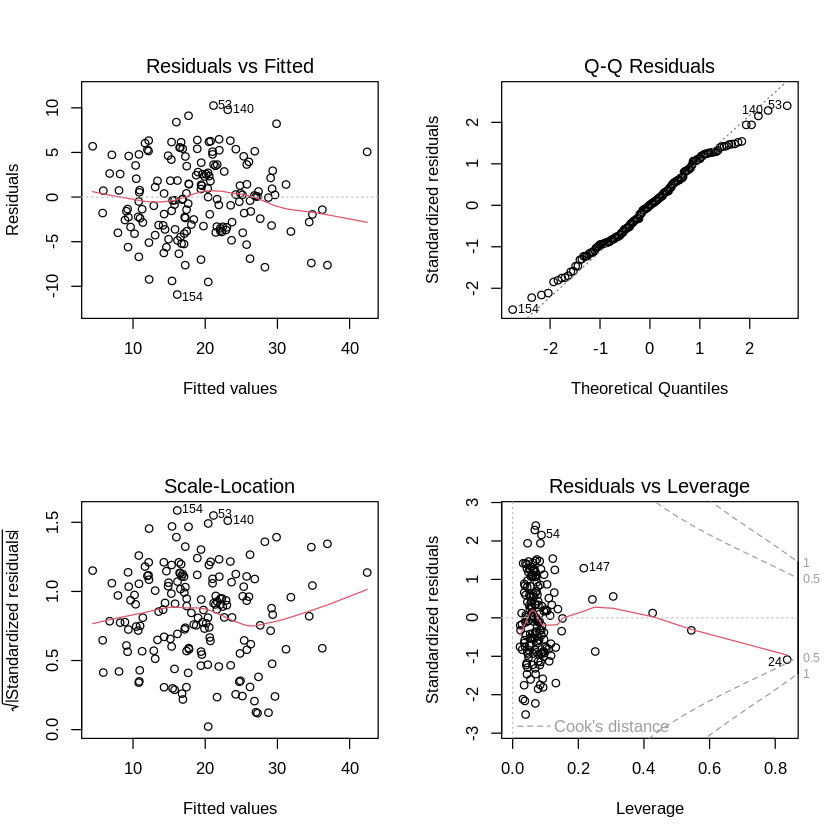

In [83]:
par(mfrow = c(2,2))

plot(lm_model_1)

**Observations**

Residuals vs Fitted:  non linearity not clearly observed

Q-Q Plot: The residuals deviate slightly from normality

Scale-Location: Indicates slight heteroscedasticity as spread increases fitted values increases

Residuals vs Leverage: point 24 is closer to 0.5 distance and can be influential

##Shapiro Wilk Test

$H0: $ The residuals follow a normal distribution

$H1: $ The residuals does not follow a normal distribution

In [84]:

#extracting residuals out of model

residuals<- residuals(lm_model_1)
#performing Shapiro Wilk test

shapiro_test<-shapiro.test(residuals)

print(shapiro_test)


	Shapiro-Wilk normality test

data:  residuals
W = 0.99199, p-value = 0.4759



p values is greater than 0.05 significance level hence we fail null hypothesis.

Therefore residuals follow a normal distribution.

In [85]:
#checking multicolinearity as well

vif(lm_model_1)

Age    Weight    Height      Neck     Chest   Abdomen       Hip     Thigh 
 2.582215 28.837889  1.625107  3.390277  9.038147  9.803621 15.197866  6.952462 
     Knee     Ankle    Biceps   Forearm     Wrist 
 4.764109  1.870029  3.420326  2.243772  2.865173

**Weight and Hip have too high of collinearity**

**Conclusion**

The residuals are normal.

Multicollinearity, slight homoscedasticity detected


---




Next step,

Since multicollinearity can de stabilise the model we proceed to build model without Weight and Hip predictors.

In [86]:
#Model without Weight and Hip

lm_model_2<-lm(BodyFat ~ Age+Height+Neck+Chest+Abdomen+Thigh+Knee+Ankle+Biceps+Forearm+Wrist,data=train)
summary(lm_model_2)


Call:
lm(formula = BodyFat ~ Age + Height + Neck + Chest + Abdomen + 
    Thigh + Knee + Ankle + Biceps + Forearm + Wrist, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.9444  -3.0959   0.1474   3.3431  10.4517 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.77986    9.67805   0.287   0.7743    
Age          0.06234    0.03946   1.580   0.1161    
Height      -0.13664    0.09724  -1.405   0.1619    
Neck        -0.39934    0.27799  -1.437   0.1529    
Chest       -0.06717    0.11996  -0.560   0.5763    
Abdomen      0.80242    0.09536   8.415 2.37e-14 ***
Thigh        0.22793    0.17482   1.304   0.1942    
Knee        -0.47961    0.29764  -1.611   0.1091    
Ankle       -0.08651    0.30867  -0.280   0.7797    
Biceps       0.08831    0.22765   0.388   0.6986    
Forearm      0.18626    0.25776   0.723   0.4710    
Wrist       -1.65830    0.70020  -2.368   0.0191 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘

The $R^2$ value no affected much. `Abdomen` and `Wrist` still remains most influential prdictors.

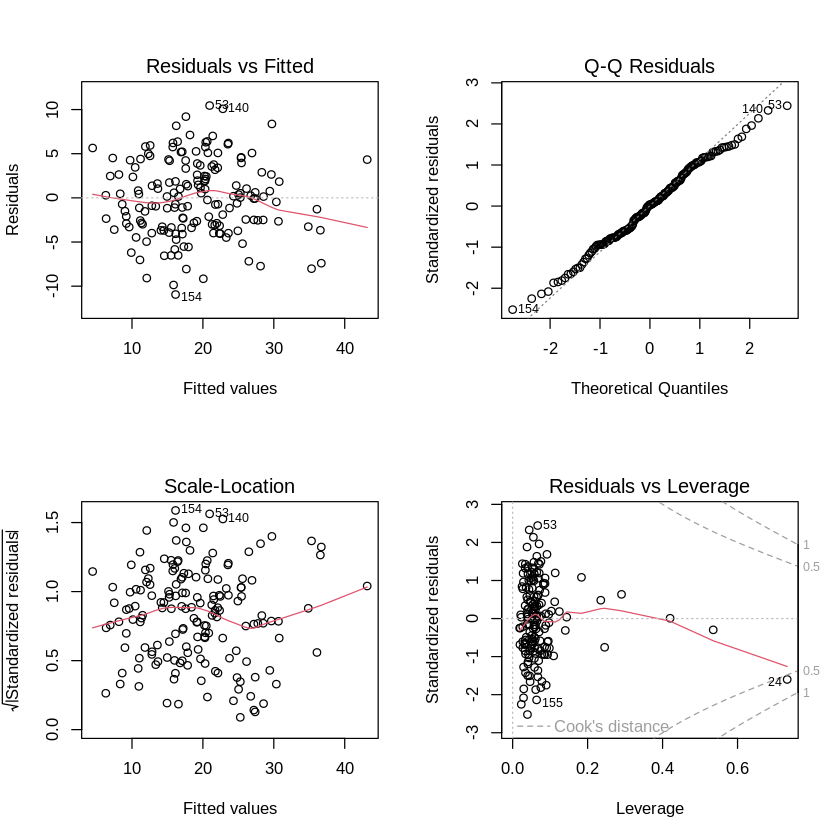

In [87]:
par(mfrow = c(2,2))

plot(lm_model_2)

**Observations**

Residuals vs Fitted:  non linearity not clearly observed still slight curvature

Q-Q Plot: The residuals deviate slightly in tails suggesting towards non normality

Scale-Location: Indicates slight heteroscedasticity as spread increases fitted values increases

Residuals vs Leverage: point 24 is closer to 0.5 distance and can be influential

In [88]:
vif(lm_model_2)

Age   Height     Neck    Chest  Abdomen    Thigh     Knee    Ankle 
2.135481 1.328301 3.164348 7.203558 7.357550 5.720195 3.904906 1.845823 
  Biceps  Forearm    Wrist 
3.379757 2.147793 2.743814

**Conclusion**

Multicollinearity issue does not persist.


---

To solve heteroscedasticity leveraging Log and Square root transformation

**Log Transformation**

In [89]:
lm_model_2_log<-lm(log(BodyFat) ~ Age+Height+Neck+Chest+Abdomen+Thigh+Knee+Ankle+Biceps+Forearm+Wrist,data=train)
summary(lm_model_2_log)


Call:
lm(formula = log(BodyFat) ~ Age + Height + Neck + Chest + Abdomen + 
    Thigh + Knee + Ankle + Biceps + Forearm + Wrist, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.28649 -0.16505  0.02661  0.21262  0.55851 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.524e+00  7.241e-01   2.105   0.0369 *  
Age          4.736e-03  2.952e-03   1.604   0.1107    
Height      -1.758e-03  7.275e-03  -0.242   0.8093    
Neck        -3.597e-02  2.080e-02  -1.729   0.0857 .  
Chest       -2.351e-03  8.976e-03  -0.262   0.7937    
Abdomen      4.625e-02  7.135e-03   6.482 1.13e-09 ***
Thigh        2.011e-02  1.308e-02   1.538   0.1262    
Knee        -2.586e-02  2.227e-02  -1.161   0.2474    
Ankle       -1.339e-02  2.309e-02  -0.580   0.5629    
Biceps      -9.836e-05  1.703e-02  -0.006   0.9954    
Forearm      1.254e-02  1.929e-02   0.650   0.5165    
Wrist       -9.238e-02  5.239e-02  -1.763   0.0798 .  
---
Signif. codes:  0 ‘

There is significant dip in $R^2$ value.

This might be due to original linear model not have inherent exponential or multiplicative property.

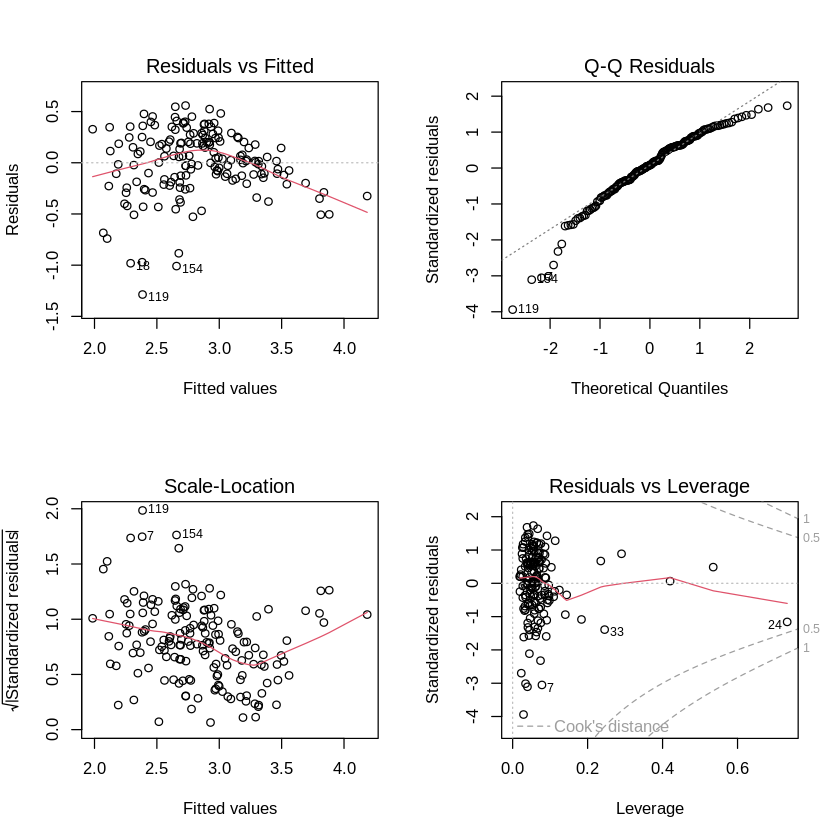

In [90]:
par(mfrow = c(2,2))

plot(lm_model_2_log)

**Observations**

Residuals vs Fitted:  Increase in curvature than before

Q-Q Plot: The residuals deviate even more than before

Scale-Location: heteroscedasticity still persist but is better than earlier plot

Residuals vs Leverage: point 24 is closer to 0.5 distance and can be influential

**Square root transformation**

In [91]:
lm_model_2_sq<-lm(sqrt(BodyFat) ~ Age+Height+Neck+Chest+Abdomen+Thigh+Knee+Ankle+Biceps+Forearm+Wrist,data=train)
summary(lm_model_2_sq)


Call:
lm(formula = sqrt(BodyFat) ~ Age + Height + Neck + Chest + Abdomen + 
    Thigh + Knee + Ankle + Biceps + Forearm + Wrist, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.66045 -0.36027  0.00737  0.41424  1.15259 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.999319   1.247958   1.602   0.1112    
Age          0.008396   0.005088   1.650   0.1009    
Height      -0.009971   0.012538  -0.795   0.4277    
Neck        -0.059214   0.035846  -1.652   0.1006    
Chest       -0.006853   0.015469  -0.443   0.6584    
Abdomen      0.093984   0.012296   7.643 2.02e-12 ***
Thigh        0.033733   0.022543   1.496   0.1366    
Knee        -0.054221   0.038380  -1.413   0.1597    
Ankle       -0.019832   0.039802  -0.498   0.6190    
Biceps       0.006505   0.029354   0.222   0.8249    
Forearm      0.023197   0.033238   0.698   0.4863    
Wrist       -0.190799   0.090290  -2.113   0.0362 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘

There is slight dip in $R^2$ value.

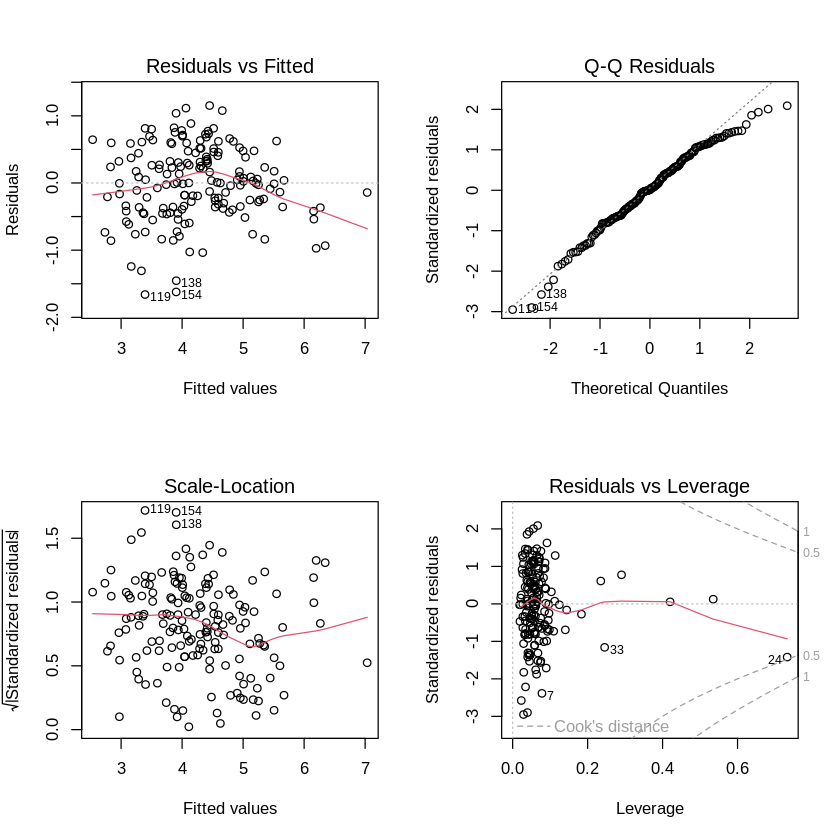

In [92]:
par(mfrow = c(2,2))

plot(lm_model_2_sq)

**Observations**

Residuals vs Fitted: heteroscedasticity still exsist

Q-Q Plot: The residuals deviate but not as much as log transformation

Scale-Location: heteroscedasticity still persist

Residuals vs Leverage: point 24 is closer to 0.5 distance and can be influential

Comparison of $R^2$ values

In [93]:
print(summary(lm_model_2)$r.squared)
print(summary(lm_model_2_log)$r.squared)
print(summary(lm_model_2_sq)$r.squared)

[1] 0.7206657
[1] 0.6179146
[1] 0.6855313


**Conclusion**

After Diagnosis we can conclude that

the model without any transformation that consist of features

`Age`, `Height`, `Neck`, `Chest`, `Abdomen`, `Thight`, `Knee`, `Ankle` , `Biceps`, `Forearm` and `Wrist`

--Doesnt have mulitcioolinearity

-- Has highest $R^2$ value

-- residuals has Normality

--is very slightly heteroscedastic and nonlinear

#**Model Selection – AIC, BIC, MSPE, R^2, Ra^2**

Why use Model Selection based on AIC, BIC, MSPE, R^2, Ra^2 ?

Using these criteria is neccessary to develop model to calculate body fat percentage accurate.

These metrics help in identifying a model that balances complexity and goodnessof fit ensuring it is neither overfit or underfit.


---
We know that

$$R_a^2 = 1 - \frac{RSS\big/\left(n-(p+1)\right)}{TSS\big/\left(n -1 \right)},$$


$$AIC\left(g\left(\mathbf{x}; \widehat{\boldsymbol\beta}\right) \right) = 2(p+1) + n\log(RSS/n).$$



$$BIC\left(g\left(\mathbf{x}; \widehat{\boldsymbol\beta}\right) \right) = (p+1)\log(n) -2\log L\left(\widehat{\boldsymbol\beta} \right),$$







Let's consider $alpha0$ = 0.15

In [94]:
summary(lm_model_2)


Call:
lm(formula = BodyFat ~ Age + Height + Neck + Chest + Abdomen + 
    Thigh + Knee + Ankle + Biceps + Forearm + Wrist, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.9444  -3.0959   0.1474   3.3431  10.4517 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.77986    9.67805   0.287   0.7743    
Age          0.06234    0.03946   1.580   0.1161    
Height      -0.13664    0.09724  -1.405   0.1619    
Neck        -0.39934    0.27799  -1.437   0.1529    
Chest       -0.06717    0.11996  -0.560   0.5763    
Abdomen      0.80242    0.09536   8.415 2.37e-14 ***
Thigh        0.22793    0.17482   1.304   0.1942    
Knee        -0.47961    0.29764  -1.611   0.1091    
Ankle       -0.08651    0.30867  -0.280   0.7797    
Biceps       0.08831    0.22765   0.388   0.6986    
Forearm      0.18626    0.25776   0.723   0.4710    
Wrist       -1.65830    0.70020  -2.368   0.0191 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘

In [95]:
lm_model_3=update(lm_model_2,. ~ . -Ankle)
summary(lm_model_3)


Call:
lm(formula = BodyFat ~ Age + Height + Neck + Chest + Abdomen + 
    Thigh + Knee + Biceps + Forearm + Wrist, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.0576  -3.1178   0.1654   3.2923  10.3767 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.46847    9.58580   0.258   0.7971    
Age          0.06542    0.03779   1.731   0.0853 .  
Height      -0.13690    0.09695  -1.412   0.1599    
Neck        -0.39256    0.27612  -1.422   0.1571    
Chest       -0.06995    0.11920  -0.587   0.5581    
Abdomen      0.80363    0.09498   8.461 1.75e-14 ***
Thigh        0.22976    0.17419   1.319   0.1891    
Knee        -0.50528    0.28237  -1.789   0.0755 .  
Biceps       0.09177    0.22664   0.405   0.6861    
Forearm      0.18710    0.25699   0.728   0.4677    
Wrist       -1.72151    0.66093  -2.605   0.0101 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.415 on 157 degrees o

In [96]:
lm_model_4=update(lm_model_3,. ~ . -Biceps)
summary(lm_model_4)


Call:
lm(formula = BodyFat ~ Age + Height + Neck + Chest + Abdomen + 
    Thigh + Knee + Forearm + Wrist, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.0532  -3.0939   0.1305   3.3069  10.2790 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.55277    9.29055   0.167   0.8675    
Age          0.06573    0.03768   1.744   0.0830 .  
Height      -0.13378    0.09638  -1.388   0.1671    
Neck        -0.38972    0.27530  -1.416   0.1589    
Chest       -0.05761    0.11493  -0.501   0.6169    
Abdomen      0.80097    0.09450   8.476 1.55e-14 ***
Thigh        0.24905    0.16710   1.490   0.1381    
Knee        -0.51174    0.28117  -1.820   0.0706 .  
Forearm      0.22650    0.23722   0.955   0.3411    
Wrist       -1.69324    0.65549  -2.583   0.0107 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.404 on 158 degrees of freedom
Multiple R-squared:  0.7202,	Adjusted R-squared:  0.

In [97]:
lm_model_5=update(lm_model_4,. ~ . -Chest)
summary(lm_model_5)


Call:
lm(formula = BodyFat ~ Age + Height + Neck + Abdomen + Thigh + 
    Knee + Forearm + Wrist, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.0878  -3.0304   0.0759   3.2733  10.5315 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.17986    9.23888   0.128   0.8985    
Age          0.06590    0.03759   1.753   0.0815 .  
Height      -0.13606    0.09605  -1.417   0.1586    
Neck        -0.41517    0.26994  -1.538   0.1260    
Abdomen      0.76809    0.06788  11.316   <2e-16 ***
Thigh        0.24615    0.16661   1.477   0.1415    
Knee        -0.51541    0.28041  -1.838   0.0679 .  
Forearm      0.20875    0.23401   0.892   0.3737    
Wrist       -1.71723    0.65220  -2.633   0.0093 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.393 on 159 degrees of freedom
Multiple R-squared:  0.7198,	Adjusted R-squared:  0.7057 
F-statistic: 51.05 on 8 and 159 DF,  p-value: < 2.2e-16

In [98]:
lm_model_6=update(lm_model_5,. ~ . -Forearm)
summary(lm_model_6)


Call:
lm(formula = BodyFat ~ Age + Height + Neck + Abdomen + Thigh + 
    Knee + Wrist, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.025  -3.021  -0.116   3.335  10.474 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.84326    9.20303   0.200   0.8415    
Age          0.06042    0.03706   1.630   0.1050    
Height      -0.13534    0.09598  -1.410   0.1605    
Neck        -0.34299    0.25736  -1.333   0.1845    
Abdomen      0.76617    0.06780  11.301   <2e-16 ***
Thigh        0.25743    0.16602   1.551   0.1230    
Knee        -0.50530    0.28000  -1.805   0.0730 .  
Wrist       -1.61313    0.64127  -2.516   0.0129 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.391 on 160 degrees of freedom
Multiple R-squared:  0.7184,	Adjusted R-squared:  0.7061 
F-statistic: 58.31 on 7 and 160 DF,  p-value: < 2.2e-16


In [99]:
lm_model_7=update(lm_model_6,. ~ . -Height)
summary(lm_model_7)


Call:
lm(formula = BodyFat ~ Age + Neck + Abdomen + Thigh + Knee + 
    Wrist, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.1262  -3.0180  -0.1336   3.2664  10.9288 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.83079    8.30196  -0.461  0.64511    
Age          0.07734    0.03517   2.199  0.02929 *  
Neck        -0.38474    0.25644  -1.500  0.13548    
Abdomen      0.76539    0.06800  11.255  < 2e-16 ***
Thigh        0.32529    0.15938   2.041  0.04288 *  
Knee        -0.59159    0.27407  -2.159  0.03237 *  
Wrist       -1.81176    0.62752  -2.887  0.00442 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.404 on 161 degrees of freedom
Multiple R-squared:  0.7149,	Adjusted R-squared:  0.7043 
F-statistic: 67.28 on 6 and 161 DF,  p-value: < 2.2e-16


In [100]:
lm_model_8=update(lm_model_7,. ~ . -Neck)
summary(lm_model_8)


Call:
lm(formula = BodyFat ~ Age + Abdomen + Thigh + Knee + Wrist, 
    data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.0149  -2.9160  -0.0598   3.3392  10.9014 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.15091    8.18810  -0.751   0.4536    
Age          0.08003    0.03526   2.270   0.0245 *  
Abdomen      0.72969    0.06395  11.410  < 2e-16 ***
Thigh        0.30367    0.15934   1.906   0.0584 .  
Knee        -0.57304    0.27485  -2.085   0.0386 *  
Wrist       -2.28252    0.54554  -4.184 4.68e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.421 on 162 degrees of freedom
Multiple R-squared:  0.7109,	Adjusted R-squared:  0.702 
F-statistic: 79.67 on 5 and 162 DF,  p-value: < 2.2e-16


In [101]:
n = 11
reg1 = regsubsets(BodyFat ~ Age+Height+Neck+Chest+Abdomen+Thigh+Knee+Ankle+Biceps+Forearm+Wrist,
                  data = train,nvmax=11)
rs = summary(reg1)
rs$which


,(Intercept),Age,Height,Neck,Chest,Abdomen,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
1,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
2,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
3,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
4,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE
5,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE
6,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE
7,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE
8,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE
9,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE
10,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE


In [102]:
n<-nrow(train)

#Defining function to calculate AIC

calc_AIC <-function(rss,k,n){
  aic<-n * log(rss/n) +2 *k
  return(aic)
}

#Defining function to calculate BIC

calc_BIC <-function(rss,k,n){
  bic<-n * log(rss/n) +k *log(n)
  return(bic)
}

#defining AIC,BIC,R2 vectors

aic_values<-numeric(length=11)
bic_values<-numeric(length=11)
adjusted_r2_values<-numeric(length=11)

#defininf loop

for (i in 1:11){

  rss<-rs$rss[i]

  adjusted_r2_values[i]<- 1- (rss/(n-i-1)) /(sum((train$BodyFat - mean(train$BodyFat))^2)/(n-1))

  k<-i + 1

  aic_values[i]<- calc_AIC(rss, k, n)

  bic_values[i]<-calc_BIC(rss,k,n)
}

#Creating a dataframe with AIC,BIC, adjusted r2 values.

criteria<-data.frame(
  Num_Predictors=1:11,
  AIC=aic_values,
  BIC=bic_values,
  Adjusted_R2=adjusted_r2_values
)

print(criteria)

   Num_Predictors      AIC      BIC Adjusted_R2
1               1 530.2087 536.4566   0.6462353
2               2 508.4650 517.8369   0.6909996
3               3 504.0570 516.5528   0.7007502
4               4 503.8025 519.4224   0.7029276
5               5 504.1933 522.9371   0.7039432
6               6 504.7525 526.6202   0.7046484
7               7 504.8979 529.8896   0.7060652
8               8 506.0591 534.1748   0.7056896
9               9 507.7922 539.0318   0.7042971
10             10 509.6168 543.9804   0.7027241
11             11 511.5323 549.0198   0.7009690


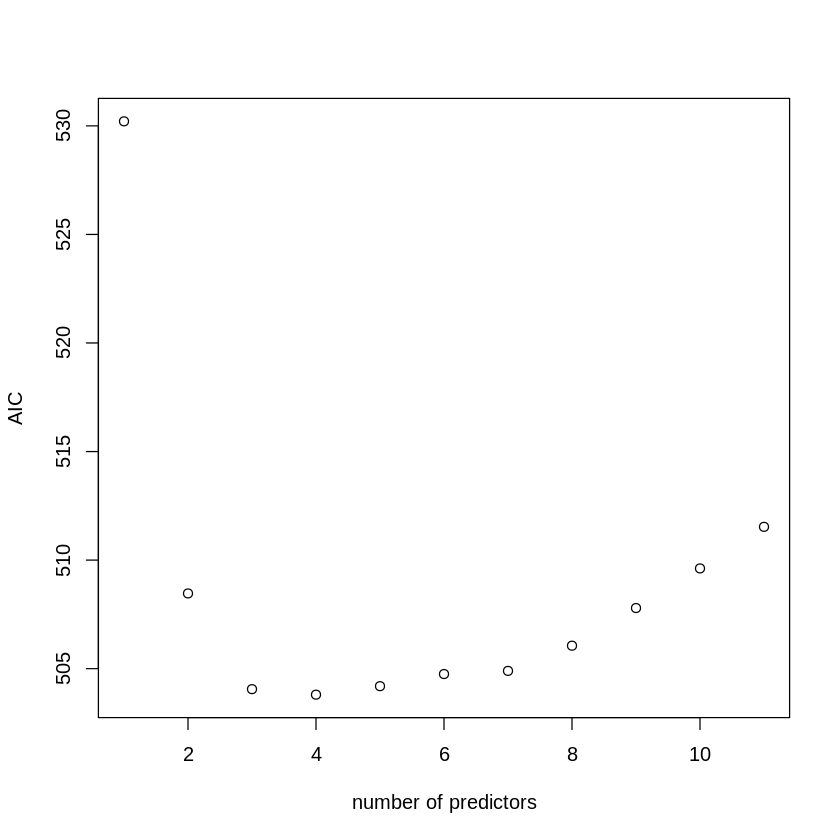

In [103]:
AIC = 2*(2:12) + n*log(rs$rss/n)
plot(AIC ~ I(1:11), xlab = "number of predictors", ylab = "AIC")

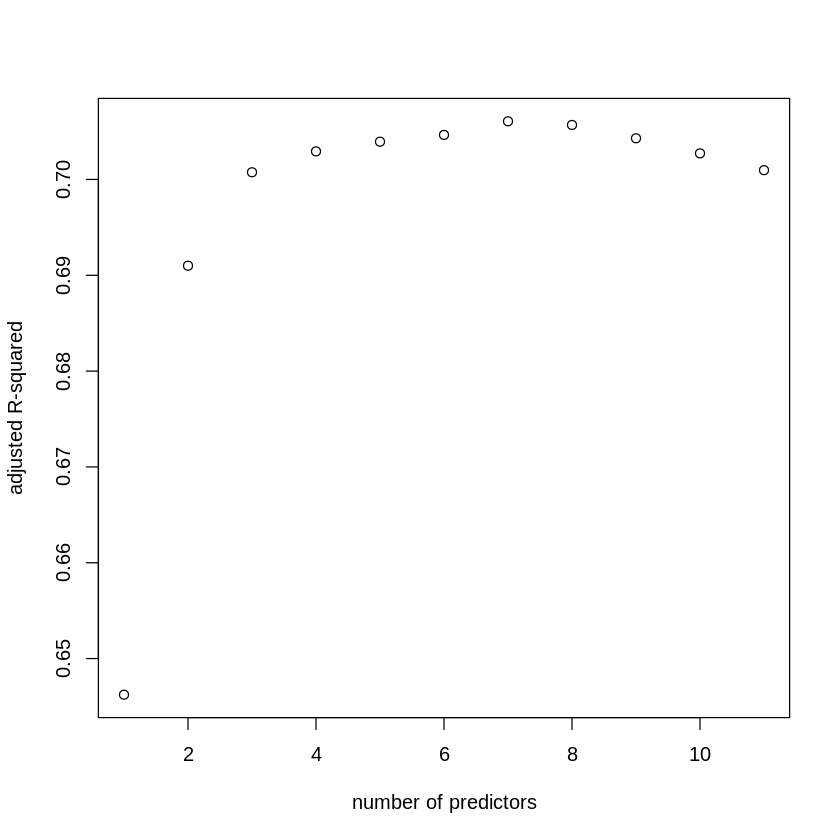

In [104]:
plot(1:11, rs$adjr2, xlab = "number of predictors", ylab = "adjusted R-squared")

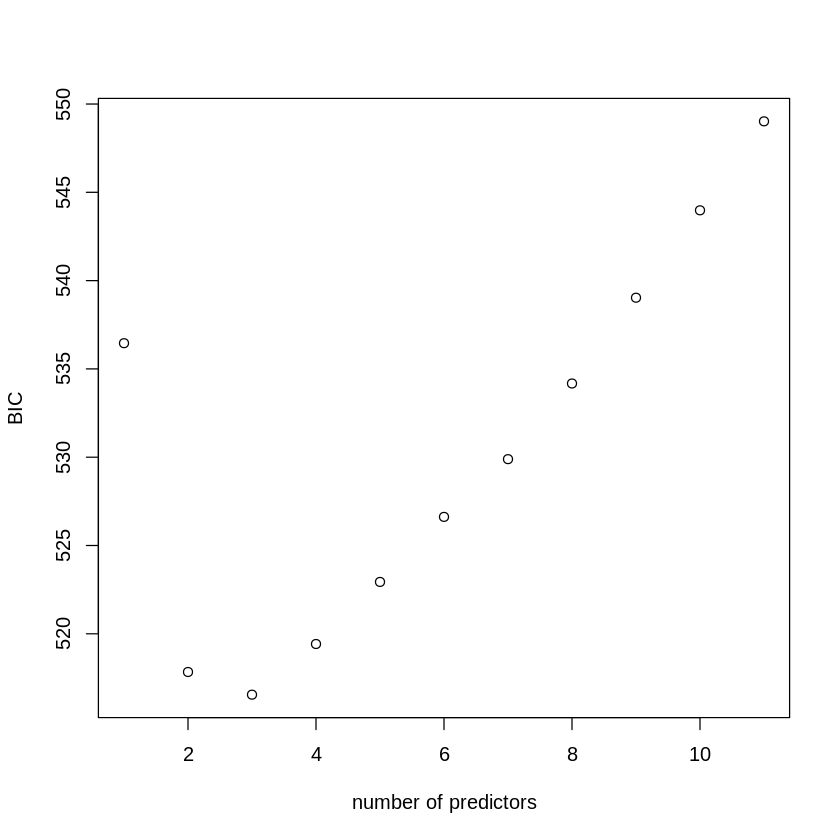

In [105]:
BIC = log(n)*(2:12) + n*log(rs$rss/n)
plot(BIC ~ I(1:11), xlab = "number of predictors", ylab = "BIC")

**Observations**

As per adjusted r2 best model have 6 features

As per AIC  best model have 3 features

As per BIC  best model have 3 features



**Conclusion**

As model with 3 features has not much difference in terms ajusted r2 in comparision with that with 6 features.

The equation of final model:

`BodyFat` = $\widehat\beta_0 + \widehat\beta_1 \times$ `Height`+  $\widehat\beta_2 \times$ `Abdomen`+ $\widehat\beta_3 \times$ `Wrist`


In [106]:
train_24 = train[-24,]

In [114]:
train[24,]

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
24,1.025,32.9,44,205,29.5,36.6,106,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4


In [116]:
train[12,]

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
12,1.0512,20.9,35,162.75,66,36.4,99.1,92.8,99.2,63.1,38.7,21.7,31.1,26.4,16.9


In [115]:
summary(train)

    Density         BodyFat           Age            Weight     
 Min.   :0.995   Min.   : 3.00   Min.   :22.00   Min.   :127.5  
 1st Qu.:1.042   1st Qu.:12.18   1st Qu.:35.00   1st Qu.:159.0  
 Median :1.055   Median :19.20   Median :43.00   Median :174.1  
 Mean   :1.056   Mean   :18.99   Mean   :44.72   Mean   :177.3  
 3rd Qu.:1.071   3rd Qu.:25.23   3rd Qu.:54.00   3rd Qu.:195.2  
 Max.   :1.093   Max.   :47.50   Max.   :72.00   Max.   :244.2  
     Height           Neck           Chest           Abdomen      
 Min.   :29.50   Min.   :31.10   Min.   : 83.40   Min.   : 70.40  
 1st Qu.:68.25   1st Qu.:36.40   1st Qu.: 93.83   1st Qu.: 84.25  
 Median :70.00   Median :37.90   Median : 99.55   Median : 90.80  
 Mean   :70.05   Mean   :37.96   Mean   :100.19   Mean   : 91.94  
 3rd Qu.:72.25   3rd Qu.:39.33   3rd Qu.:104.75   3rd Qu.: 98.88  
 Max.   :77.50   Max.   :43.90   Max.   :121.60   Max.   :122.10  
      Hip             Thigh            Knee           Ankle      
 Min.   : 


Call:
lm(formula = BodyFat ~ Height + Abdomen + Wrist, data = train_24)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.4261  -3.1632  -0.2472   3.1137   9.7556 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 16.33816   10.30051   1.586 0.114643    
Height      -0.48716    0.14226  -3.424 0.000779 ***
Abdomen      0.76449    0.04099  18.651  < 2e-16 ***
Wrist       -1.83826    0.52406  -3.508 0.000584 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.371 on 163 degrees of freedom
Multiple R-squared:  0.7106,	Adjusted R-squared:  0.7052 
F-statistic: 133.4 on 3 and 163 DF,  p-value: < 2.2e-16


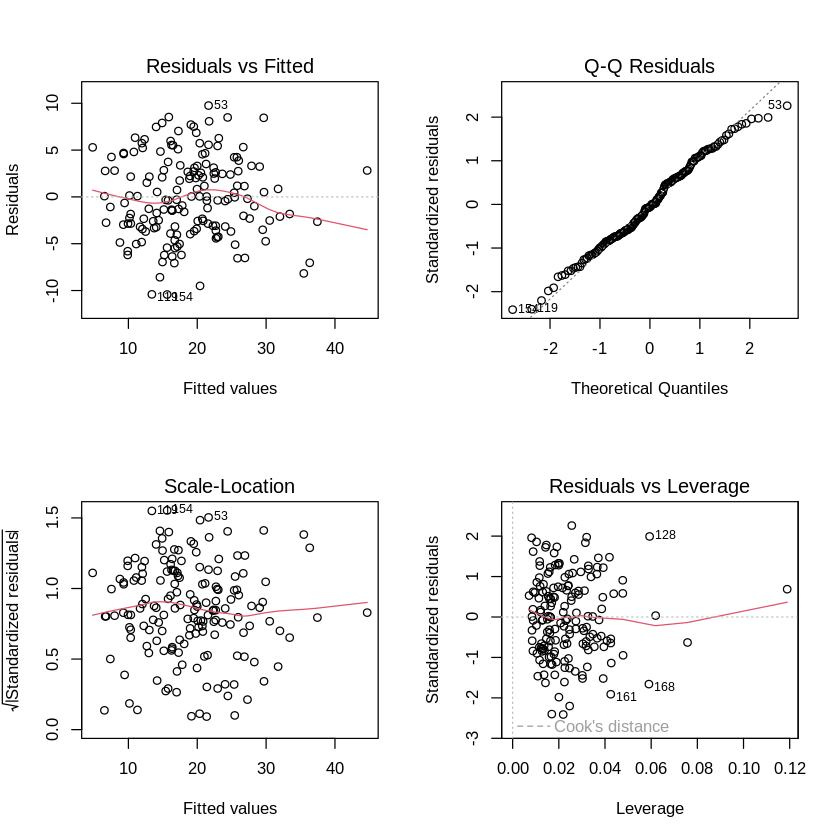

In [107]:
lm_final<-lm(BodyFat ~ Height + Abdomen + Wrist,
                 data = train_24)
par(mfrow = c(2,2))
summary(lm_final)
plot(lm_final)

**Observations**

Residuals vs Fitted: there is slight non linearity in the centerof the plot.

Q-Q Plot: The residuals doesnt seem to deviate much

Scale-Location: there is no evidence of non constant variance indicating homoscedasticity

Residuals vs Leverage: they arent any  influential points

**Results**

No regression assumptions were violated

The $R^2$ value is 71%

#**GLM**

Why use GLM?

As GLMs can handle non linear response distributions , allowing for accurate modeling of heteroscedastic data.

This is purely just for exploration.

In [117]:
library(stats)
glm_model <-glm(BodyFat ~ Height + Abdomen + Wrist,
                 data = train_24,
                 family=gaussian())

summary(glm_model)


Call:
glm(formula = BodyFat ~ Height + Abdomen + Wrist, family = gaussian(), 
    data = train_24)

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 16.33816   10.30051   1.586 0.114643    
Height      -0.48716    0.14226  -3.424 0.000779 ***
Abdomen      0.76449    0.04099  18.651  < 2e-16 ***
Wrist       -1.83826    0.52406  -3.508 0.000584 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 19.10285)

    Null deviance: 10757.6  on 166  degrees of freedom
Residual deviance:  3113.8  on 163  degrees of freedom
AIC: 972.5

Number of Fisher Scoring iterations: 2


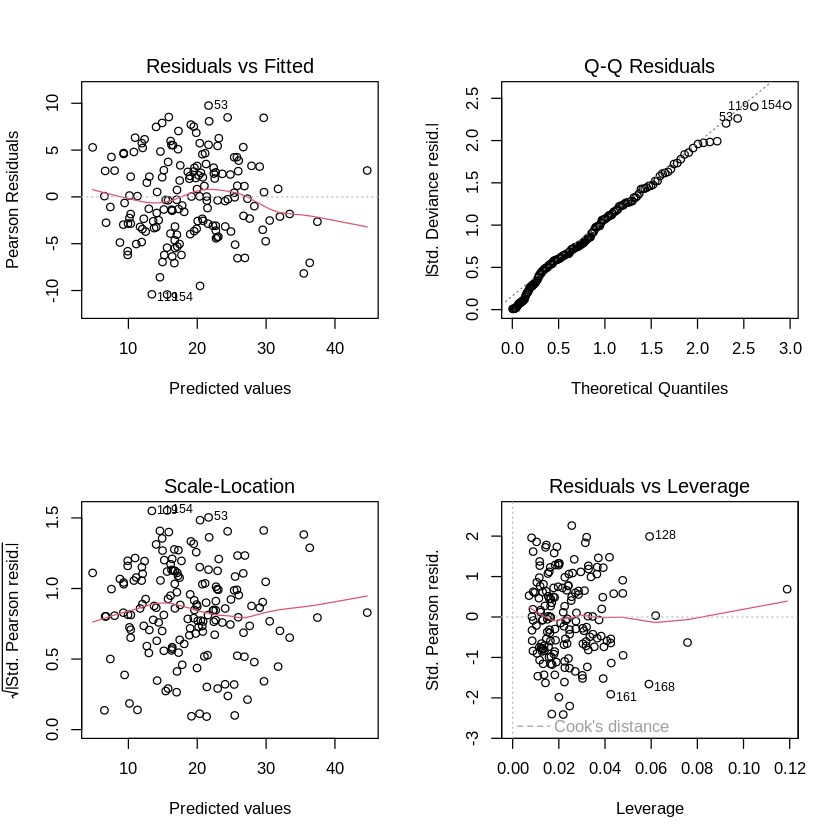

In [118]:
par(mfrow = c(2,2))
plot(glm_model)


Call:
glm(formula = BodyFat ~ Height + Abdomen + Wrist, family = gaussian(), 
    data = train_24)

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 16.33816   10.30051   1.586 0.114643    
Height      -0.48716    0.14226  -3.424 0.000779 ***
Abdomen      0.76449    0.04099  18.651  < 2e-16 ***
Wrist       -1.83826    0.52406  -3.508 0.000584 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 19.10285)

    Null deviance: 10757.6  on 166  degrees of freedom
Residual deviance:  3113.8  on 163  degrees of freedom
AIC: 972.5

Number of Fisher Scoring iterations: 2


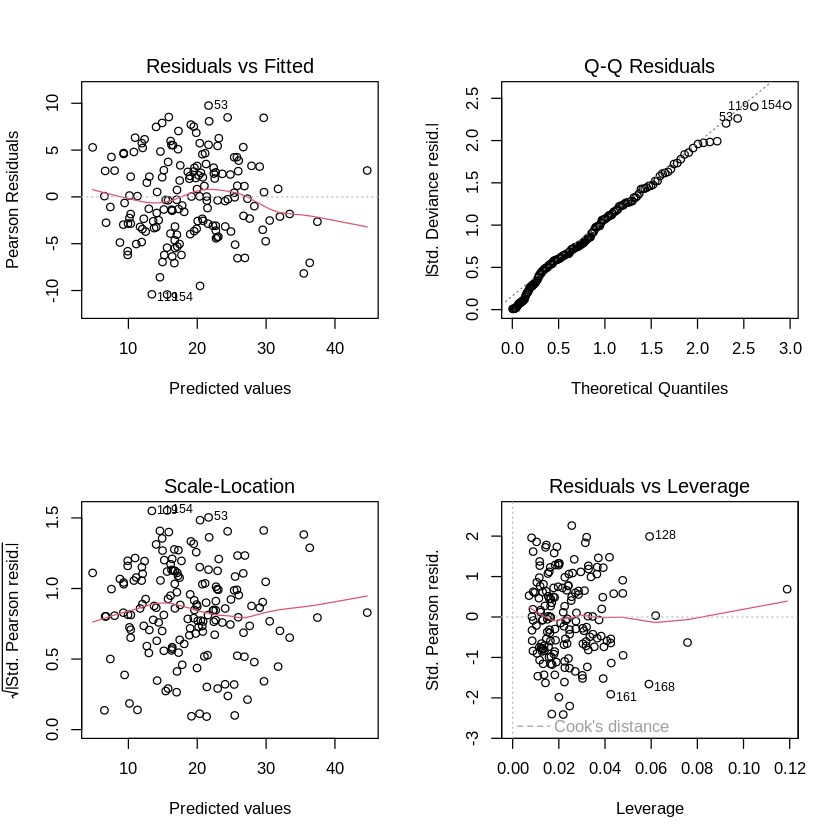

In [111]:
#gaussian GLM

glm_1 <-glm(BodyFat ~ Height + Abdomen + Wrist,
                 data = train_24,
                 family=gaussian())

summary(glm_1)

par(mfrow=c(2,2)); plot(glm_1)

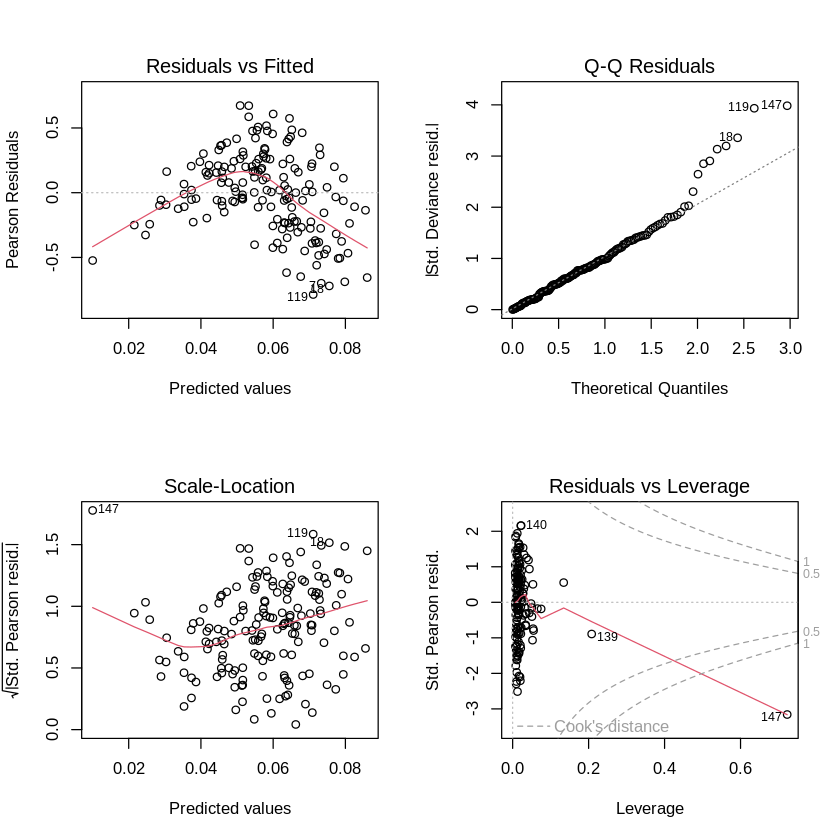

In [112]:
#Inverse gamma GLM
gamma_glm<-glm(BodyFat ~ Height + Abdomen + Wrist,
                 data = train_24,
                 family=Gamma(link='inverse'))


par(mfrow=c(2,2)); plot(gamma_glm)

**Observations**

from plots

Residuals vs Fitted: The curvature increased after using gaussian and inverse gamma GLM

Q-Q Plot: The residuals have much more deviation than linear model.

Scale-Location: there is evidence of hetroscedasticity

Residuals vs Leverage: they are any  influential point veyond 0.5 (point 147)

from models

AIC decreased for inverse gamma model indicating a better model fit.

**Results**

Overall Linear regressionis more suitable modelling technique for our data




#**Report**


---

###Introduction

The reason why i am interested in this problem is because understanding body fat percentage is important to access individul health status that helps in developing fitness regime or atleast give a sense of alert to an individual.
Health and Wellness are non negotiable part of being. The traditional methods of measuring body fat are expensive and not easily available. A statistical exploration can help common man and in larger picture can curtail obesity and other lifestyle diseases.

The dataset consist of measurements reevant to the body composition such as density determined through underwater weighing,circumference measurements, age ,weight and height data.It references established methods like Siri's equation for estimating body fat percentage and predictive equations for leanbody weight. The measurements adhere to standards.This dataset is valuable to researchers and practitioners.

You can refer to
Bailey, Covert (1994). Smart Exercise: Burning Fat, Getting Fit, Houghton-Mifflin Co., Boston, pp. 179-186.

Behnke, A.R. and Wilmore, J.H. (1974). Evaluation and Regulation of Body Build and Composition, Prentice-Hall, Englewood Cliffs, N.J.

Siri, W.E. (1956), "Gross composition of the body", in Advances in Biological and Medical Physics, vol. IV, edited by J.H. Lawrence and C.A. Tobias, Academic Press, Inc., New York.
.

for background research on the topic,especially to understand Siri's equation.

The data was sourced from Kaggle. It is observational data .
This collection of data provides approximations of the percentage of body fat, which were obtained by measuring body circumference and using underwater weighing methods for 168 men without any manipulation by reserachers.The data was collected as part of ML olmypiad Competition.

The questions of interest in this project revolve around understanding the relationship between various factors and Body fat percentage. Additionally the projects seeks to determine if there are differences in body fat percentage between different age groups, particularly comparing with individual below and above 50 years of age. Also to investigate of there is correlation between height and bodyfat percentage.




###Methods/Results (experimental design and data collection)

The data was obtained through Kaggle in form of csv.This is part of Kaggle Competition(ML Olympiad): Predicting Wellness.Id column was dropped as it was irrelevant to our analysis. Since data didnt had any na values therefore no further cleaning done. Various Exploratory data analysis methods were performed in order to understand the data. This includes Histograms of all the features and correlation plot. The purpose of it was to understand association between variables which proved to be useful while evaluating for mulitcollinearity. Histograms were useful to identify if predictors are normal and analyse skewness.To answer the main question of interest F-test, regression modeling, diagnosticsof the model,Anova, Model selection analyses were leveraged. For other question pearson correlation, t-test, bootstrapping, hypothesis testing with and without randomization were manuvered.




Hypothesis testing evaluate whether mean body fat differs for individuals above and bekow 50 years indicating no significant difference. Pearson correlation tests reveal a correlation between height and bodyfat. Randomization tests exaime differences in body fat between age groups, finding a significant difference.Linear Regressionwas built with influential predictors.Final model selection was done using AIC,BIC, adjusted r2 and a final model with three features such as height,abdomen, wrist as optimal,balanced complexity and goodness of fit. Multilinear regression assumptions were always taken in consideration. Those are

- There must be a linear relationship between the response variable and the independent variables.

- Multivariate Normality - assume that residuals are normally distributed.

- No multicollinearity - assume that the independent variable are not highly correlated with each other.

- Homoscedasticity - assume that the variance of error terms is similar across the values of the independent variables.

If we refer to Corrleation plot it gave us a fair indication and prelude to multicollinearity that initially cause mutlicollinearity.

Referring to the final model (lm_final) diagnosis plot we observed almost linear model with slight curvature and homoscedasticity. They arent any influential points and residuals are almost normal.The final model obtained  :answers our main question:The problem statement of the project is to develop a model that aims to provide accurate and reliable estimates of body fat percentage, which can be valuable for assessing individual health status and informing personalized fitness ans nutrition interventions.




###Conclusions

The analysis demostrated that a linear regression with height, abdomen circumference and wrist circumference as predictors can accurately estimate body fat percentage that has $R^2$  value of 71%. After accessing other model types , linear regression emerged as the most suitable modeling technique for the dataset. We learnt all the important regression techniques in the process.

Other regression models such as xgboost, Gradient boosting, Lasso and Ridge models can we used for better $R^2$ value.


